*Josh Albano, Sharon Jan, and Luke Sherman (that's me)*

*2020.5.4*

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import re




from IPython.display import display, Latex, Markdown

#  Research plan?

In [107]:
# **Research Question 1**: What county level factors predict the number of daily new cases of Covid-19?



# - We have a set of time series policy variables that should have an impact. (e.g. stay at home orders). 
#     - These time series variables will probably have a lag associated with them, so we need to incorporate that piece. One neat thing we could try to would be to usse lags of various lengths to find out the lag that has the best fit.
#     - We might need to think about using a kernel density function for the visualizations
    
#     <br>

# - We also might have some fixed county level factors that could contribute (e.g., political views).
#     <br>
# - Note the data key can be accessed here: https://github.com/Yu-Group/covid19-severity-prediction/blob/master/data/list_of_columns.md

# ***

# **Research Question 2**: What county level factors predict the Covid-19 mortality rate?


# ***

# **Research Question 3**: (Maybe some kind of spatial question?)

# EDA
## Taking a look at the dataset



In [3]:
# Looking at the data

states_df = pd.read_csv("4.18states.csv")


In [4]:
counties_df = pd.read_csv("abridged_couties.csv")

In [5]:
time_cases_df = pd.read_csv("time_series_covid19_confirmed_US.csv")

In [6]:
time_deaths_df = pd.read_csv("time_series_covid19_deaths_US.csv")

In [7]:
counties_df.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [8]:
time_cases_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4

In [9]:
time_deaths_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20'

# Let's look at the basics

Let's look at the distribution of stay at home orders by county:

Text(0.5, 1.0, 'Distribution of stay at home orders by US county')

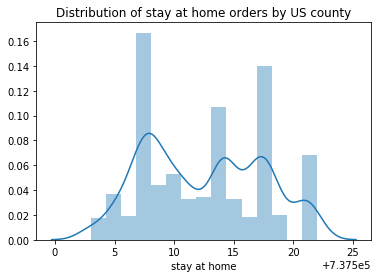

In [10]:
sns.distplot(counties_df["stay at home"].dropna())

plt.title("Distribution of stay at home orders by US county")

#I haven't figured out the date formatting here, but need to do that!

In [11]:
us = time_cases_df.groupby("Country_Region").sum().iloc[:,15:].to_numpy().flatten()

Text(0.5, 1.0, 'Cumuative cases since Feb')

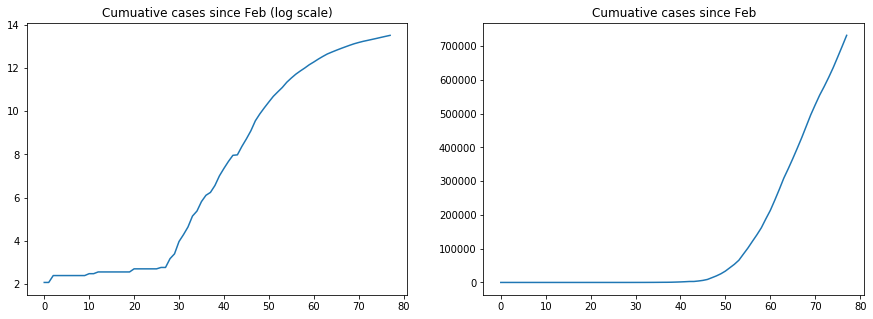

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(np.arange(0,len(us)), np.log(us))

ax[0].set_title("Cumuative cases since Feb (log scale)")

ax[1].plot(np.arange(0,len(us)), us)

ax[1].set_title("Cumuative cases since Feb")

Text(0.5, 1.0, 'Daily new cases since Feb')

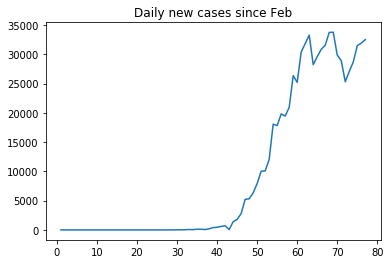

In [13]:
plt.plot(np.arange(1,len(us)), np.diff(us) )
plt.title("Daily new cases since Feb")

<BarContainer object of 77 artists>

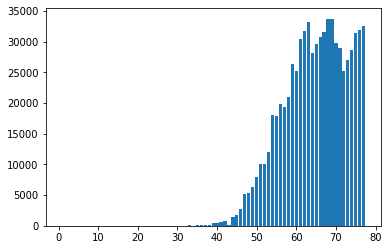

In [14]:
# Same as above, but in bar graph form

plt.bar(np.arange(1,len(us)), np.diff(us) )

Okay, now what I really want to do is understand how "stay at home orders" impact the new daily cases by county.

## Addressing the date time conversion on time series data

In [15]:
# The date objects were extremely annoying, so I built this function to convert them to pandas

def convert_ordinal_date_series_to_pd_date(series_object):
    """
    This function takes a series object of ordinal dates (days from the beginning of the 
    Gregorian calendar) and returns a pandas date time object series
    """
    
    #series_object = series_object.astype(int)
    
    k = []
    y = 0
    
    for ordinal_date in series_object:
        if np.isnan(ordinal_date) == True:
            y += 1
            k.append(np.nan)
            
        else:
            ordinal_date = int(ordinal_date)
            k.append(pd.to_datetime(datetime.datetime.fromordinal(ordinal_date)))
    print("Your series has", y, "NaNs. This function converts them to NaTs.")
    return pd.Series(k, index = series_object.index)

In [16]:
# Let's test this function
# Alameda closed on March 17. Let's see if we can get that

index = counties_df[counties_df["CountyName"] == "Alameda"]["stay at home"].index
print("\n Date Alameda County closed:",convert_ordinal_date_series_to_pd_date(counties_df["stay at home"])[index].iloc[0])


# okay so this is interesting. This dataset only includes the state shutdowns orders, even though it
# seems to be at the county level...


#print("\n", counties_df[counties_df["StateName"]=="CA"]["stay at home"])


print("\n This shows that all the counties had stay at home orders on the same day, even though Alameda issued a county order earlier")

print("\n Anyway, the function works and gets the date converstion right.")

Your series has 592 NaNs. This function converts them to NaTs.

 Date Alameda County closed: 2020-03-19 00:00:00

 This shows that all the counties had stay at home orders on the same day, even though Alameda issued a county order earlier

 Anyway, the function works and gets the date converstion right.


In [90]:
counties_df["dem_to_rep_ratio"]

0       0.326656
1       0.253255
2       0.893106
3       0.278124
4       0.094317
5       3.096491
6       0.760253
7       0.402921
8       0.737473
9       0.172791
10      0.193024
11      0.757185
12      0.805182
13      0.235844
14      0.118668
15      0.265890
16      0.436642
17      0.900585
18      0.527063
19      0.179920
20      0.368713
21      0.115129
22      0.319597
23      2.217309
24      0.169213
25      0.305529
26      0.463513
27      0.322752
28      0.202920
29      0.232094
          ...   
3214         NaN
3215         NaN
3216         NaN
3217         NaN
3218         NaN
3219         NaN
3220         NaN
3221         NaN
3222         NaN
3223         NaN
3224         NaN
3225         NaN
3226         NaN
3227         NaN
3228         NaN
3229         NaN
3230         NaN
3231         NaN
3232    1.373356
3233    1.868706
3234         NaN
3235         NaN
3236         NaN
3237         NaN
3238         NaN
3239         NaN
3240         NaN
3241         N

In [18]:
ids = ["FIPS","Admin2", "Province_State", "Country_Region"]

date_column_begin = 11

dates = pd.to_datetime(time_cases_df.columns[date_column_begin:])

In [24]:
df = time_cases_df[ids + list(time_cases_df.columns[date_column_begin:])]

df = df.melt(ids)

#date = pd.to_datetime(df["variable"])

df["date"] = date

df = df.rename(columns = {"value" : "cases"})

In [25]:
table = df.pivot_table(values = "cases", index = [ "Province_State", "date"],  aggfunc=sum).reset_index()

table

Province_State       date  cases
0           Alabama 2020-01-22      0
1           Alabama 2020-01-23      0
2           Alabama 2020-01-24      0
3           Alabama 2020-01-25      0
4           Alabama 2020-01-26      0
5           Alabama 2020-01-27      0
6           Alabama 2020-01-28      0
7           Alabama 2020-01-29      0
8           Alabama 2020-01-30      0
9           Alabama 2020-01-31      0
10          Alabama 2020-02-01      0
11          Alabama 2020-02-02      0
12          Alabama 2020-02-03      0
13          Alabama 2020-02-04      0
14          Alabama 2020-02-05      0
15          Alabama 2020-02-06      0
16          Alabama 2020-02-07      0
17          Alabama 2020-02-08      0
18          Alabama 2020-02-09      0
19          Alabama 2020-02-10      0
20          Alabama 2020-02-11      0
21          Alabama 2020-02-12      0
22          Alabama 2020-02-13      0
23          Alabama 2020-02-14      0
24          Alabama 2020-02-15      0
25          Alabama 2020-02-16      0
26          Alabama 2020-02-17      0
27          Alabama 2020-02-18      0
28          Alabama 2020-02-19      0
29          Alabama 2020-02-20      0
...             ...        ...    ...
5074        Wyoming 2020-03-20     21
5075        Wyoming 2020-03-21     23
5076        Wyoming 2020-03-22     26
5077        Wyoming 2020-03-23     26
5078        Wyoming 2020-03-24     29
5079        Wyoming 2020-03-25     44
5080        Wyoming 2020-03-26     53
5081        Wyoming 2020-03-27     70
5082        Wyoming 2020-03-28     82
5083        Wyoming 2020-03-29     86
5084        Wyoming 2020-03-30     94
5085        Wyoming 2020-03-31    109
5086        Wyoming 2020-04-01    130
5087        Wyoming 2020-04-02    150
5088        Wyoming 2020-04-03    162
5089        Wyoming 2020-04-04    187
5090        Wyoming 2020-04-05    197
5091        Wyoming 2020-04-06    210
5092        Wyoming 2020-04-07    216
5093        Wyoming 2020-04-08    221
5094        Wyoming 2020-04-09    230
5095        Wyoming 2020-04-10    239
5096        Wyoming 2020-04-11    261
5097        Wyoming 2020-04-12    270
5098        Wyoming 2020-04-13    275
5099        Wyoming 2020-04-14    282
5100        Wyoming 2020-04-15    287
5101        Wyoming 2020-04-16    296
5102        Wyoming 2020-04-17    305
5103        Wyoming 2020-04-18    309

[5104 rows x 3 columns]

In [26]:
ca = table[table["Province_State"] == "California"]

J = np.array([np.nan])

ca.loc[:,"daily_new_cases"] = np.concatenate([J, np.diff(ca["cases"])])

ca

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Province_State       date  cases  daily_new_cases
440     California 2020-01-22      0              NaN
441     California 2020-01-23      0              0.0
442     California 2020-01-24      0              0.0
443     California 2020-01-25      0              0.0
444     California 2020-01-26      2              2.0
445     California 2020-01-27      2              0.0
446     California 2020-01-28      2              0.0
447     California 2020-01-29      2              0.0
448     California 2020-01-30      2              0.0
449     California 2020-01-31      3              1.0
450     California 2020-02-01      3              0.0
451     California 2020-02-02      3              0.0
452     California 2020-02-03      6              3.0
453     California 2020-02-04      6              0.0
454     California 2020-02-05      6              0.0
455     California 2020-02-06      6              0.0
456     California 2020-02-07      6              0.0
457     California 2020-02-08      6              0.0
458     California 2020-02-09      6              0.0
459     California 2020-02-10      6              0.0
460     California 2020-02-11      7              1.0
461     California 2020-02-12      7              0.0
462     California 2020-02-13      8              1.0
463     California 2020-02-14      8              0.0
464     California 2020-02-15      8              0.0
465     California 2020-02-16      8              0.0
466     California 2020-02-17      8              0.0
467     California 2020-02-18      8              0.0
468     California 2020-02-19      8              0.0
469     California 2020-02-20      8              0.0
..             ...        ...    ...              ...
498     California 2020-03-20   1243            238.0
499     California 2020-03-21   1405            162.0
500     California 2020-03-22   1646            241.0
501     California 2020-03-23   2108            462.0
502     California 2020-03-24   2538            430.0
503     California 2020-03-25   2998            460.0
504     California 2020-03-26   3899            901.0
505     California 2020-03-27   4657            758.0
506     California 2020-03-28   5095            438.0
507     California 2020-03-29   5852            757.0
508     California 2020-03-30   7138           1286.0
509     California 2020-03-31   8210           1072.0
510     California 2020-04-01   9399           1189.0
511     California 2020-04-02  10773           1374.0
512     California 2020-04-03  12004           1231.0
513     California 2020-04-04  12837            833.0
514     California 2020-04-05  15034           2197.0
515     California 2020-04-06  16019            985.0
516     California 2020-04-07  17351           1332.0
517     California 2020-04-08  18897           1546.0
518     California 2020-04-09  19710            813.0
519     California 2020-04-10  21081           1371.0
520     California 2020-04-11  21706            625.0
521     California 2020-04-12  22795           1089.0
522     California 2020-04-13  23931           1136.0
523     California 2020-04-14  25356           1425.0
524     California 2020-04-15  26686           1330.0
525     California 2020-04-16  27677            991.0
526     California 2020-04-17  29157           1480.0
527     California 2020-04-18  30491           1334.0

[88 rows x 4 columns]

In [27]:
threshold = 300
ca = ca[ca["cases"] >= threshold]
ca["days_since_threshold"] = np.arange(0,len(ca))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


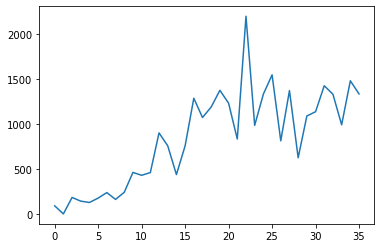

In [31]:
plt.plot(ca["days_since_threshold"], ca["daily_new_cases"])

In [87]:
lm = LinearRegression()

x = np.array(ca["days_since_threshold"]).reshape(-1,1)

y = np.array(ca["daily_new_cases"]).reshape(-1,1)

lm.fit(x,y)

y_hat = lm.predict(x)

$new.cases = \beta_0 + \beta_1~time$

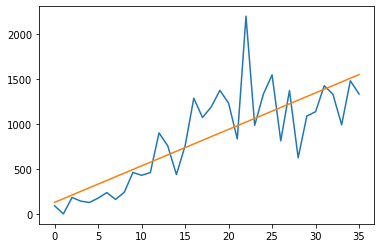

In [89]:
#fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.plot(ca["days_since_threshold"], (ca["daily_new_cases"]))
plt.plot(ca["days_since_threshold"], y_hat)

In [94]:
lm = LinearRegression()

ca["days_since_threshold^2"] = ca["days_since_threshold"]**2

x = ca[["days_since_threshold","days_since_threshold^2"]]

y = np.array(ca["daily_new_cases"]).reshape(-1,1)

lm.fit(x,y)

y_hat = lm.predict(x)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'days since 300 cases')

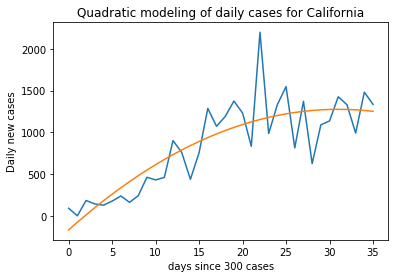

In [105]:
plt.plot(ca["days_since_threshold"], (ca["daily_new_cases"]))
plt.plot(ca["days_since_threshold"], y_hat)

plt.title("Quadratic modeling of daily cases for California")
plt.ylabel("Daily new cases")
plt.xlabel("days since {} cases".format(threshold))

$new.cases = \beta_0 + \beta_1~time + \beta_2~time$

In this functional form, it easy to interpret $\beta_2$ as the deceleration rate. We can calculate state by state deceleration rates.
 
If we find that a variety of policies are indeed correlated with democratic leanings, can we also see if they explain the deceleration rate?

**Or can we try to use the decelerration rates to classify whether a state is democrat or republican?**

(Maybe we could think about democratic affiliation as an instrument because it is highly correlated with time (via a suite of policy interventions), but should be uncorrelated with new cases EXCEPT through the policies we're interested in.)